In [2]:
### Análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criação do modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Avaliação de métricas
from sklearn.metrics import accuracy_score

data = pd.read_csv("rede.csv", delimiter=';')
data.head() # imprimir 5 primeiros registros

,mac0,mac1,mac2,mac3,mac4,mac5,rssi,local
0,180,121,200,57,49,40,-64.75000,0
1,180,121,200,56,192,184,-66.30769,0
2,48,135,217,1,75,40,-78.66666,0
3,48,135,217,1,78,72,-79.50000,0
4,48,135,217,2,254,8,-82.00000,0


In [3]:
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Separando dados
## Variáveis preditoras
X = data.loc[:,['mac0','mac1','mac2','mac3','mac4','mac5','rssi']]
X = np.array(X)

## Variável alvo
y = data["local"]
y = np.array(y)

## Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
print(f"Tamanho X de treino: {X_train.shape}")
print(f"Tamanho X de teste: {X_test.shape}")
print(f"Tamanho y de treino: {y_train.shape}")
print(f"Tamanho y de teste: {y_test.shape}")

Tamanho X de treino: (42, 7)
Tamanho X de teste: (18, 7)
Tamanho y de treino: (42,)
Tamanho y de teste: (18,)


In [4]:
tree.fit(X_train, y_train)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
tree_predict = tree.predict(X_test)

knn_predict = knn.predict(X_test)

In [6]:
# Avaliação
tree_score = accuracy_score(y_test, tree_predict)
knn_score = accuracy_score(y_test, knn_predict)

print(f"Pontuação Decision Tree:{tree_score}")
print(f"Pontuação KNN:{knn_score}")

Pontuação Decision Tree:0.7222222222222222
Pontuação KNN:0.5


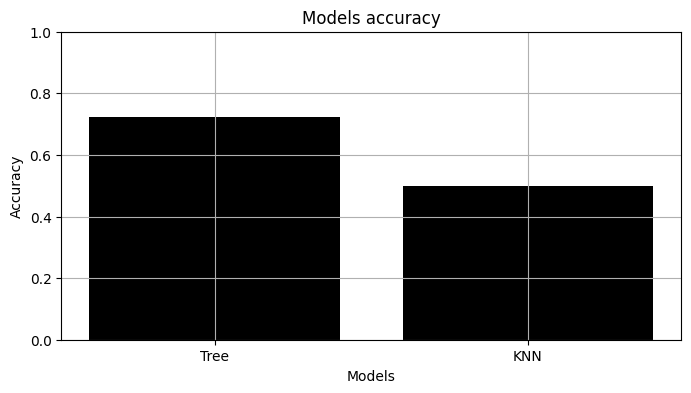

In [7]:
# Plotando resultados
plt.figure(figsize = (8,4))
plt.title("Models accuracy")
plt.bar(x = [0,1], height = [tree_score, knn_score], color = "black")
plt.xticks([0,1], ["Tree", "KNN"])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.grid()
plt.show()

In [8]:
mac0 = input('MAC 0')
mac1 = input('MAC 1')
mac2 = input('MAC 2')
mac3 = input('MAC 3')
mac4 = input('MAC 4')
mac5 = input('MAC 5')
rssi = input('RSSI')


entry = [mac0,mac1,mac2,mac3,mac4,mac5,rssi]
array = [entry]
print(f"Para os valores: {mac0,mac1,mac2,mac3,mac4,mac5,rssi} o local é:")

resposta_tree_predict = tree.predict(array)
if resposta_tree_predict == 0:
    print("Biblioteca")
elif resposta_tree_predict == 1:
    print("CDG")
elif resposta_tree_predict == 2:
    print("CIDC")
elif resposta_tree_predict == 3:
    print("E-Health")

# 48
# 135
# 217
# 2
# 250
# 200
# -76.5

Para os valores: ('180', '121', '200', '5', '194', '120', '-83.4') o local é:
CDG
